In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluations
from sklearn.model_selection import train_test_split

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
#loading data
df = pd.read_csv("/Users/amendrasingh/Downloads/Fraud.csv")

In [3]:
# Let's see how the data looks like
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
#checking sum of missing values in every column
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.shape

(6362620, 11)

In [7]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
#overall fraud and non fraud
(df["isFraud"]==1).sum(), (df["isFraud"]==0).sum()

(8213, 6354407)

In [9]:
#flagged values in given data
(df["isFlaggedFraud"]==1).sum()

16

The total number of fraud transaction is 8213.

The total number of fraud transaction which is marked as fraud 16.

Ratio of fraud transaction vs non-fraud transaction is 1:773.


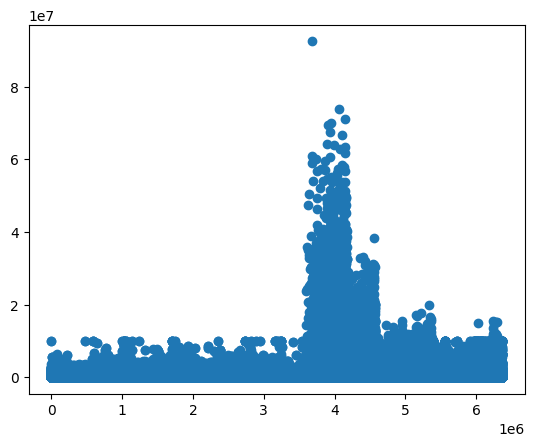

In [10]:
# Let's plot the transaction amounts

fig, ax = plt.subplots()

#we are using scatter plot
ax.scatter(df.index,df.amount);

In [11]:
#unique values of "type" column
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [12]:
#count of values
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [13]:
df[df.isFraud==1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [14]:
#can dropout the rest of the type

In [15]:
(df.isFraud).value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [16]:
(df.isFlaggedFraud).value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [17]:
df.type

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [18]:
df.loc[df.isFraud==1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [19]:
df.loc[df.isFraud==1].type.value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

fraud is only occured during TRANSFER and CASH_OUT
* So rest of the type can be dropped

Taking data which includes only  Transfer and Cash_out (type)

In [20]:
X = df.loc[(df.type=='TRANSFER') | (df.type=='CASH_OUT')]


In [21]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [22]:
y= X['isFraud']
y.head(5)

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

Dropping the nameDest and nameOrig column

In [23]:
X=X.drop(['nameDest','nameOrig','isFraud','isFlaggedFraud'],axis=1)

In [24]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89


Binary encoding of labelled data in type

In [25]:
X.loc[X.type=="TRANSFER",'type'] =0
X.loc[X.type=="CASH_OUT",'type'] =1

X.type = X.type.astype(int)

In [26]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [27]:
X_fraud = X.loc[y==1]
X_nonFraud = X.loc[y==0]

In [28]:
X_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.0,181.0,0.0,0.0,0.0
3,1,1,181.0,181.0,0.0,21182.0,0.0
251,1,0,2806.0,2806.0,0.0,0.0,0.0
252,1,1,2806.0,2806.0,0.0,26202.0,0.0
680,1,0,20128.0,20128.0,0.0,0.0,0.0


In [29]:
X_nonFraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44
19,1,0,215310.30,705.00,0.0,22425.0,0.00
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18


In [30]:
#sns.heatmap(df.corr(),cmap='PRGn');

we can see that TRANSFER and CASH_OUT are also the only way in which fraud happen.

Conclusion:

1.OldbalanceOrg and NewbalanceOrg are highly correlated.

2.OldbalanceDest and NewbalanceDest are highly correlated.

3.Amount is correlated with isFraud(Target Variable).

the current system is letting fraud transaction able to pass through a system which is not labeling them as a fraud.


In [34]:
np.random.seed(37)

# split data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
X.shape,X_fraud.shape,X_nonFraud.shape


((2770409, 7), (8213, 7), (2762196, 7))

In [37]:
y.shape

(2770409,)

In [38]:
(y==0).sum()

2762196

In [39]:
(y==1).sum()

8213

In [40]:
weight = (y==0).sum() /1.0 * (y==1).sum()
weight

22685915748.0

In [42]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
from sklearn.metrics import average_precision_score

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb_classifier2 = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
xgb_prediction2 = xgb_classifier2.fit(X_train, Y_train).predict_proba(X_test)

print('AUPRC = {}'.format(average_precision_score(Y_test, xgb_prediction2[:,1])))

AUPRC = 0.35971496452552637


In [49]:
X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [51]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.00,0.00,0.00,1.810000e+02
3,1,1,181.00,181.00,0.0,21182.00,0.00,0.00,2.136300e+04
15,1,1,229133.94,15325.00,0.0,5083.00,51513.44,213808.94,1.827035e+05
19,1,0,215310.30,705.00,0.0,22425.00,0.00,214605.30,2.377353e+05
24,1,0,311685.89,10835.00,0.0,6267.00,2719172.89,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.0,0.00,339682.13,0.00,0.000000e+00
6362616,743,0,6311409.28,6311409.28,0.0,0.00,0.00,0.00,6.311409e+06
6362617,743,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,0.00,1.000000e-02
6362618,743,0,850002.52,850002.52,0.0,0.00,0.00,0.00,8.500025e+05


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

weights = (y==0).sum()/(1.0 *  (y==1).sum())
xgb_classifier3 = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
xgb_prediction3 = xgb_classifier3.fit(X_train, Y_train).predict_proba(X_test)

print('AUPRC = {}'.format(average_precision_score(Y_test, xgb_prediction3[:,1])))

AUPRC = 0.9923956057108406


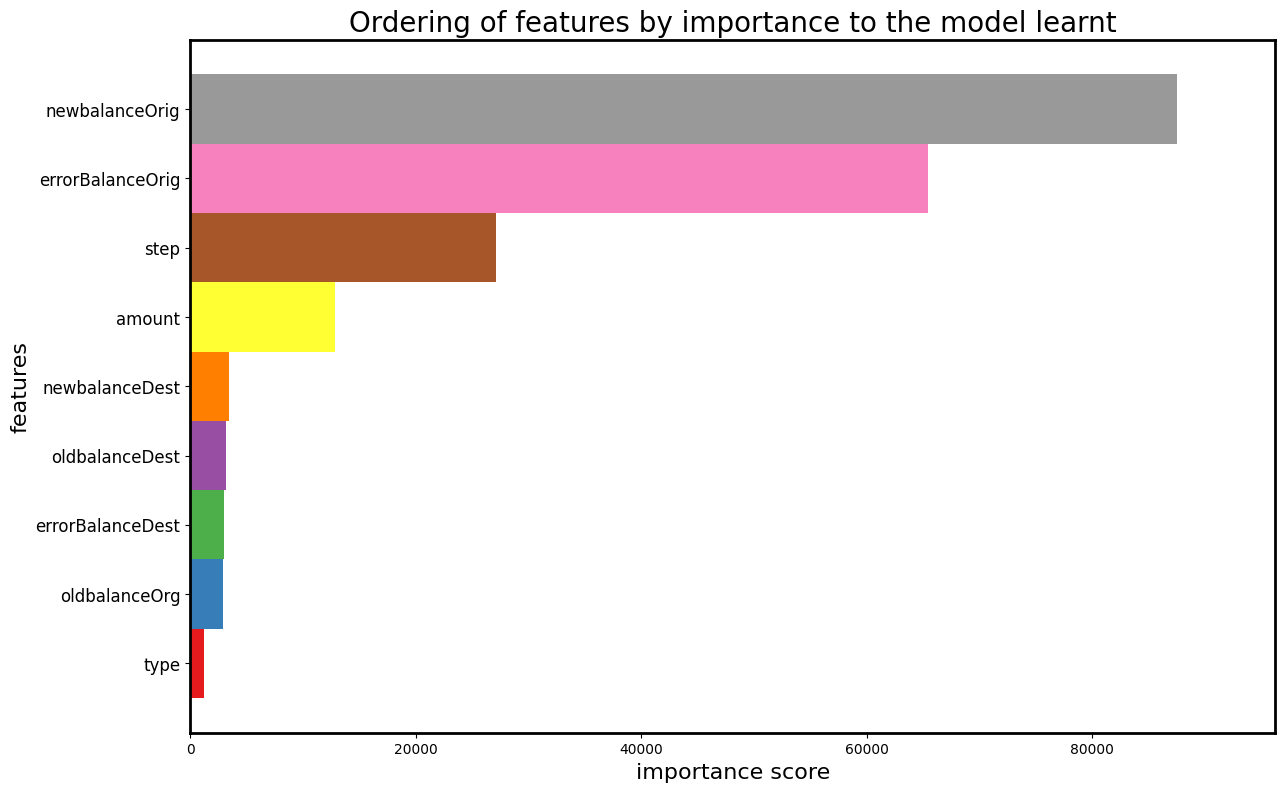

In [56]:
from xgboost import plot_importance
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(xgb_classifier3, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);